# Import and sandbox

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import itertools
import torch
import yaml

In [3]:
df = pd.read_parquet("/home/maxime/synrepos/phenospace/jump_pl/images_embeddings/ResNet50/metadata/load_wells/load_wells.parquet")

In [9]:
plates = df['Metadata_Plate'].unique()
for plate in tqdm(plates):
    df_plate= df[(df['Metadata_Plate']==plate) & (df['Metadata_JCP2022']=='JCP2022_033924')]
    if len(df_plate) == 0:
        print(plate)

  0%|          | 0/1607 [00:00<?, ?it/s]

  9%|▊         | 140/1607 [00:08<01:28, 16.63it/s]

Dest210628-162003


 15%|█▍        | 238/1607 [00:14<01:21, 16.78it/s]

Dest210823-174240
Dest210823-174422


100%|██████████| 1607/1607 [01:36<00:00, 16.61it/s]


In [8]:

df['Metadata_JCP2022'].value_counts()

Metadata_JCP2022
JCP2022_033924    81340
JCP2022_037716     7666
JCP2022_064022     7663
JCP2022_025848     7660
JCP2022_046054     7654
                  ...  
JCP2022_010836        2
JCP2022_044729        2
JCP2022_100016        2
JCP2022_080384        1
JCP2022_090832        1
Name: count, Length: 112480, dtype: int64

In [5]:
df['path_embedding'] = df['Well_Embedding_mean']

In [6]:
df.to_parquet("/home/maxime/synrepos/phenospace/jump_pl/images_embeddings/ResNet50/metadata/load_wells/load_wells.parquet", index=False)

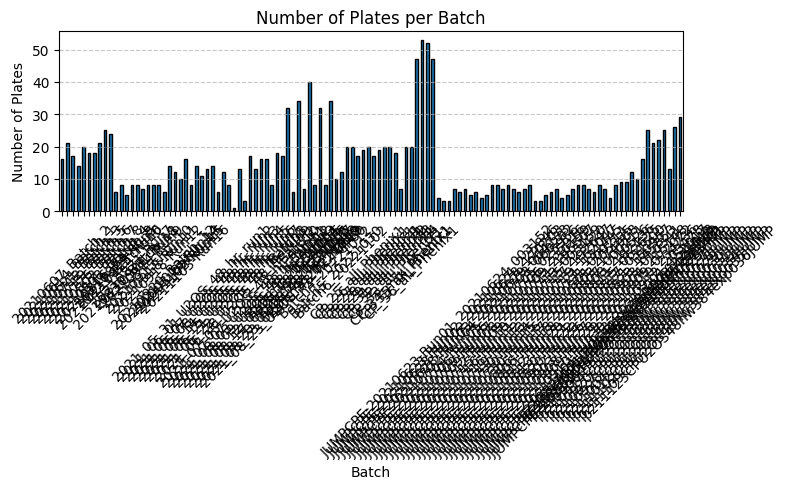

In [8]:
plate_count_per_batch = df.groupby("Metadata_Batch")["Metadata_Plate"].nunique()

# Plot the histogram
plt.figure(figsize=(8, 5))
plate_count_per_batch.plot(kind='bar', edgecolor='black')
plt.title("Number of Plates per Batch")
plt.xlabel("Batch")
plt.ylabel("Number of Plates")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()